In [1]:
# Import relevant packages
from functools import reduce
import matplotlib.pyplot as plt
import missingno as msno
import numpy as np
import os
import pandas as pd
import seaborn as sns

In [2]:
str_ = '11'
str_.zfill(2)

'11'

In [3]:
def find_closest(num, find_min=True, num_list=np.linspace(0, 1, 51)):
    for i, num_ in enumerate(num_list):
        if find_min:
            lb = num_list[max(i-1, 0)]
            if lb >= num:
                return lb
        else:
            ub = num_
            if ub >= num:
                return ub

find_min_max_closest = lambda num, num_list=np.linspace(0, 1, 101): \
    (find_closest(num, True, num_list), find_closest(num, False, num_list))

num = 0.49
find_min_max_closest(num)

(0.49, 0.49)

In [4]:
np.linspace(0, 1, 51)

array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
       0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
       0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
       0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
       0.88, 0.9 , 0.92, 0.94, 0.96, 0.98, 1.  ])

In [5]:
# Load data_properset
data = pd.read_csv(r"Mental Health Dataset.csv")

# In total, there are 292364 entries
# Only `self_employed` contains missing values (5202, which is 1.8%). We can remove these from the dataset
data = data[~pd.isnull(data['self_employed'])].reset_index(drop=True)

C:\Users\BramUser\AppData\Local\Temp\ipykernel_10996\4037032746.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=12.5)
C:\Users\BramUser\AppData\Local\Temp\ipykernel_10996\4037032746.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
C:\Users\BramUser\AppData\Local\Temp\ipykernel_10996\4037032746.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=12.5)
C:\Users\BramUser\AppData\Local\Temp\ipykernel_10996\4037032746.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xtic

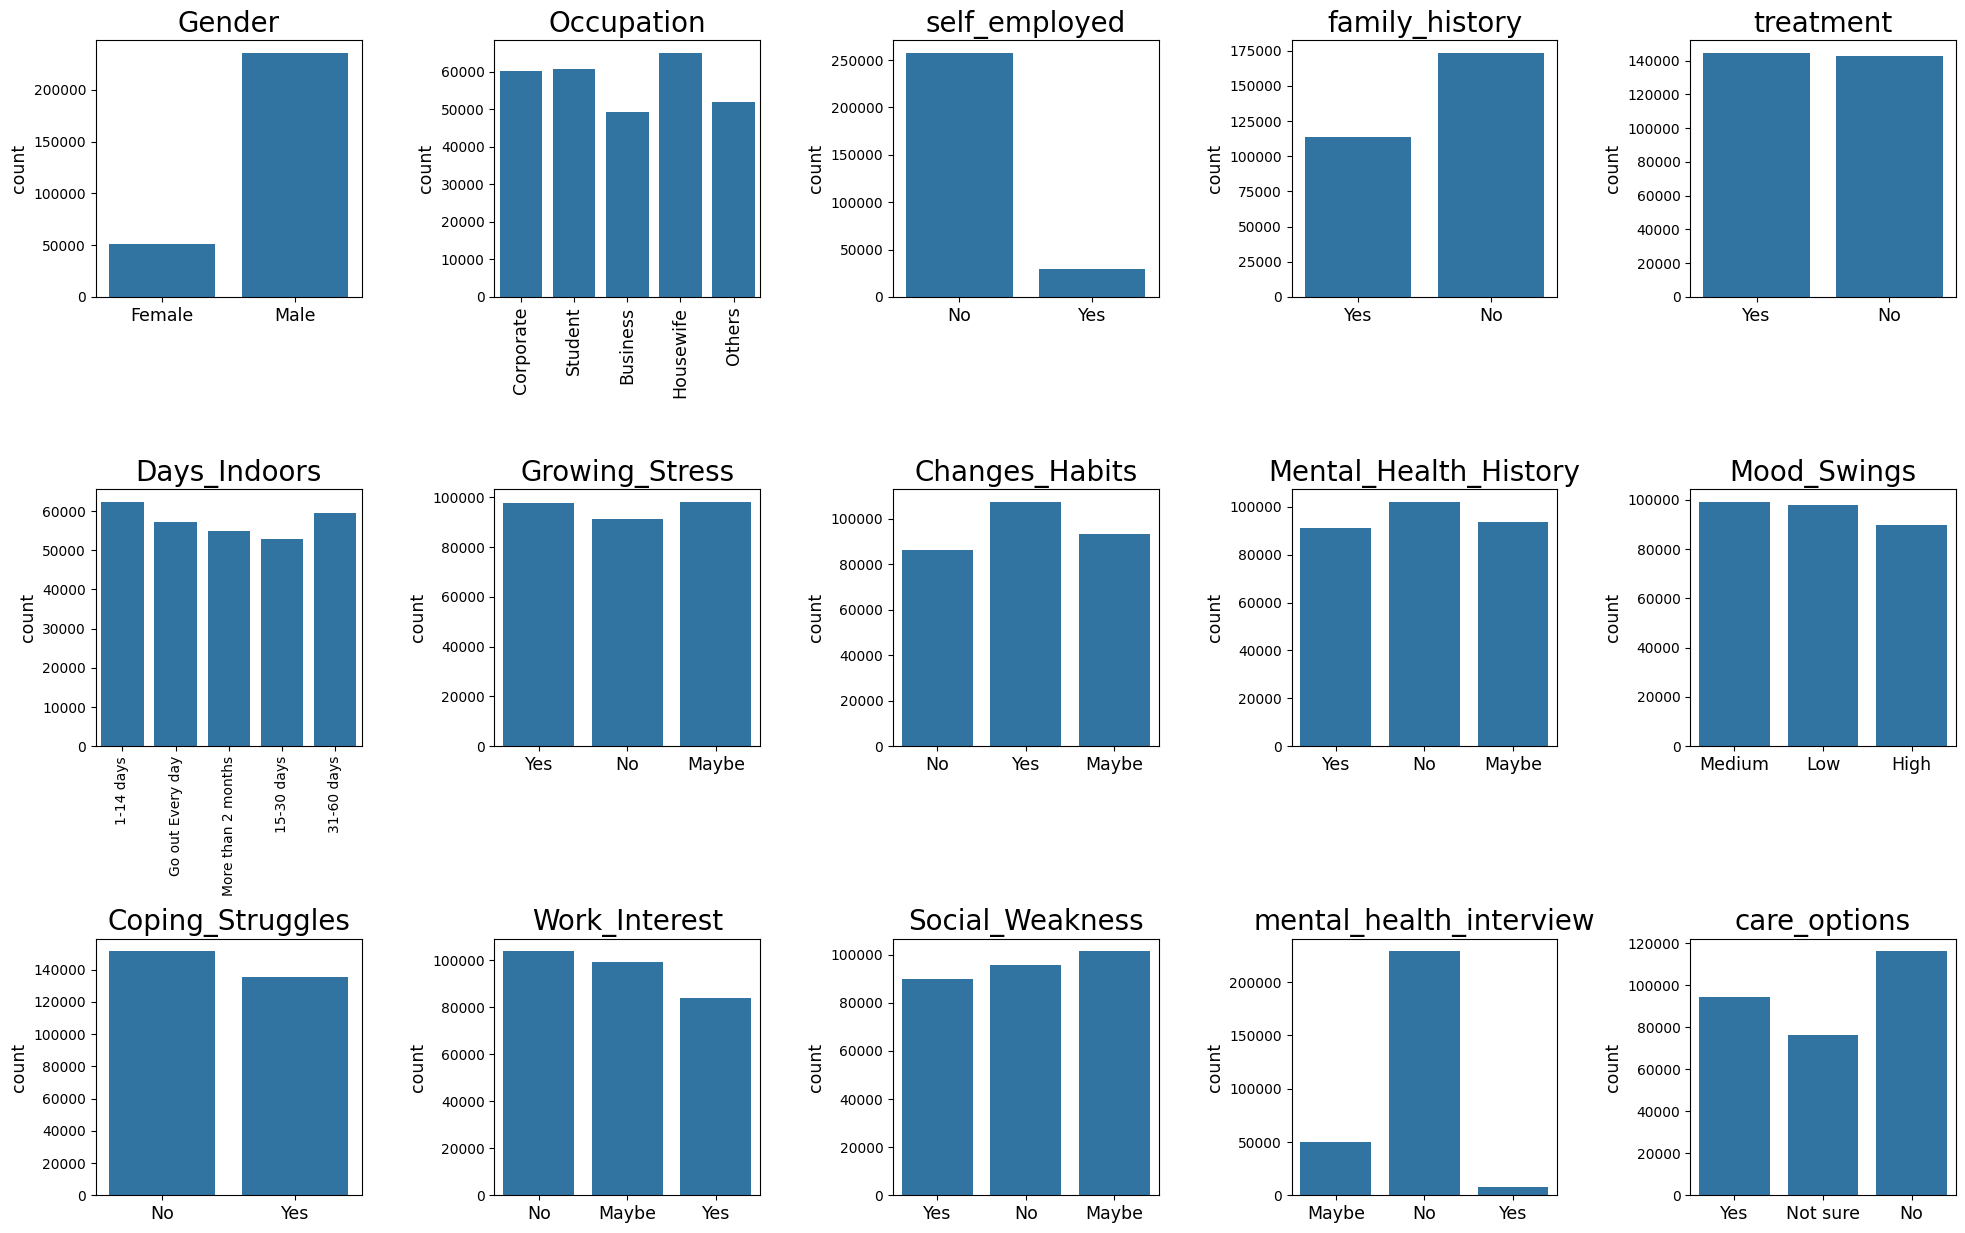

In [6]:
# Visualize columns
# Exclude `Timestamp` & `Country` columns
vis_cols = [col for col in data.columns if col != "Timestamp" if col != "Country"]

figsize = (len(vis_cols)//4), len(vis_cols) // (len(vis_cols)//4)
fig, axes = plt.subplots(nrows=figsize[0], ncols=figsize[1], figsize=(24, 15))

# Adjust the space between subplots
plt.subplots_adjust(wspace=0.5, hspace=0.75)

# Plot counts
for i, (column, ax) in enumerate(zip(vis_cols, axes.flatten())):
    sns.countplot(data=data, x=column, ax=ax)
    if len(data[column].unique()) > 3:
        if column == 'Days_Indoors':
            ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=8)
        else:
            ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    if column != 'Days_Indoors':
        ax.set_xticklabels(ax.get_xticklabels(), fontsize=12.5)
    else:
        ax.set_xticklabels(ax.get_xticklabels(), fontsize=10)
    ax.set_xlabel("")
    ax.set_ylabel(ax.get_ylabel(), fontsize=12.5)
    ax.set_title(column, fontsize=20)
plt.show()

In [7]:
# Data Transformation:
# For columns with only 2 options: one-hot encoding
# Ordinal columns: 0, 1, 2, ...
# Categorical columns with multiple options: one-hot encoding for each options 

def return_counts(array):
    """Returns the unique values counts of an array as a dictionary."""
    value_counts = dict()
    counts = np.unique(array, return_counts=True)
    for value, count_ in zip(counts[0], counts[1]):
        value_counts[value] = count_
    return value_counts

def one_hot_encode(data: pd.DataFrame, col: str, which: str = None):
    """Performs one-hot encoding on a column. Optionally only keeps one reference value. Returns a DataFrame."""
    one_hot_col = pd.get_dummies(data[col])
    if not(which is None):
        one_hot_col = pd.DataFrame({col: one_hot_col[which]})
    return one_hot_col

def convert_ordinal(data: pd.DataFrame, col: str, reference: str):
    """Performs one-hot encoding on an ordinal column. Removes one column which serves as the reference variable."""
    one_hot_data = one_hot_encode(data, col)
    del one_hot_data[reference]
    one_hot_data = pd.DataFrame(one_hot_data.to_numpy(), columns = [f"{col}_"+column for column in one_hot_data.columns])
    return one_hot_data

# def convert_ordinal(data: pd.DataFrame, col: str, conv_dict: dict):
#     """Converts ordinal data to a numeric values. Returns a DataFrame."""
#     col_numeric = data[col].apply(conv_dict.get).values
#     return pd.DataFrame({col: col_numeric})

In [8]:
## Binary variables ##

# Female
female = one_hot_encode(data, 'Gender', 'Female')

# Self-employed
self_employed = one_hot_encode(data, 'self_employed', 'Yes')

# Family history
family_history = one_hot_encode(data, 'family_history', 'Yes')

# Treatment
treatment = one_hot_encode(data, 'treatment', 'Yes')

# Coping struggles
coping_struggles = one_hot_encode(data, 'Coping_Struggles', 'Yes')

# Get data with binary variables as df
binary_data = reduce(lambda df_1, df_2: pd.concat([df_1, df_2], axis=1),
                     [female, self_employed, family_history, treatment, coping_struggles])

In [9]:
## Categorical variables ##

# Occupation
occupation = one_hot_encode(data, 'Occupation')
occupation = pd.DataFrame(occupation.to_numpy(), columns = ["Occupation_"+column for column in occupation.columns])

# Days indoors
days_indoors = one_hot_encode(data, 'Days_Indoors')
days_indoors = pd.DataFrame(days_indoors.to_numpy(), 
                            columns = [f"Days_Indoors_{column.lower().replace(' ', '_').replace('-', '_')}" 
                                       for column in days_indoors.columns])

# Get data with categorical variables as df
categorical_data = pd.concat([occupation, days_indoors], axis=1)

In [10]:
## Ordinal variables ##

# Growing stress
growing_stress = convert_ordinal(data, 'Growing_Stress', 'No')

# Changes habits
changes_habits = convert_ordinal(data, 'Changes_Habits', 'No')

# Mental health history
mental_health_history = convert_ordinal(data, 'Mental_Health_History', 'No')

# Mood swings
mood_swings = convert_ordinal(data, 'Mood_Swings', 'Low')

# Work interest
work_interest = convert_ordinal(data, 'Work_Interest', 'No')

# Social weakness
social_weakness = convert_ordinal(data, 'Social_Weakness', 'No')

# Mental health interview
mental_health_interview = convert_ordinal(data, 'mental_health_interview', 'No')

# Care options
care_options = convert_ordinal(data, 'care_options', 'No')

# Get ordinal data variables as df
ordinal_data = reduce(lambda df_1, df_2: pd.concat([df_1, df_2], axis=1), 
                      [growing_stress, changes_habits, mental_health_history, mood_swings, work_interest, social_weakness,
                       mental_health_interview, care_options])

In [11]:
# Country column
country_locations = {
    'United States': 'Northern America',
    'Poland': 'Eastern Europe',
    'Australia': 'Australia and New Zealand',
    'Canada': 'Northern America',
    'United Kingdom': 'Northern Europe',
    'South Africa': 'Southern Africa',
    'Sweden': 'Northern Europe',
    'New Zealand': 'Australia and New Zealand',
    'Netherlands': 'Western Europe',
    'India': 'Southern Asia',
    'Belgium': 'Western Europe',
    'Ireland': 'Northern Europe',
    'France': 'Western Europe',
    'Portugal': 'Southern Europe',
    'Brazil': 'South America',
    'Costa Rica': 'Central America',
    'Russia': 'Eastern Europe',
    'Germany': 'Western Europe',
    'Switzerland': 'Western Europe',
    'Finland': 'Northern Europe',
    'Israel': 'Western Asia',
    'Italy': 'Southern Europe',
    'Bosnia and Herzegovina': 'Southern Europe',
    'Singapore': 'Southeastern Asia',
    'Nigeria': 'Western Africa',
    'Croatia': 'Southern Europe',
    'Thailand': 'Southeastern Asia',
    'Denmark': 'Northern Europe',
    'Mexico': 'Central America',
    'Greece': 'Southern Europe',
    'Moldova': 'Eastern Europe',
    'Colombia': 'South America',
    'Georgia': 'Western Asia',
    'Czech Republic': 'Eastern Europe',
    'Philippines': 'Southeastern Asia'
}

# Get geographical locations as df
georegions = pd.DataFrame({'Georegion': data['Country'].map(country_locations).values})
georegions = one_hot_encode(georegions, 'Georegion')
georegions = pd.DataFrame(georegions.to_numpy(), columns=[col.replace(' ', '_') for col in georegions.columns])

In [12]:
# Get Timestamp variable as df
timestamp = pd.DataFrame({'Timestamp': data['Timestamp'].values})

# Concatenate all datasets & convert to CSV file
data_proper = reduce(lambda df_1, df_2: pd.concat([df_1, df_2], axis=1), 
                     [timestamp,binary_data, categorical_data, ordinal_data, georegions])
data_proper['Country'] = data['Country']

# Rename countries to match the geopandas dataset
rename_countries = {
    'United States': 'United States of America',
    'Czech Republic': 'Czechia',
    'Bosnia and Herzegovina': 'Bosnia and Herz.',
    # 'United Kingdom': 'United Kingdom of Great Britain and Northern Ireland'
}

data_proper['Country'] = data_proper['Country'].replace(rename_countries)

data_proper.rename(columns={"Gender": "Female"}, inplace=True)

if not(os.path.exists(r"data_cleaned.csv")):
    data_proper.to_csv(r"data_cleaned.csv", index=False)

C:\Users\BramUser\AppData\Local\Temp\ipykernel_10996\3577351155.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=10)
C:\Users\BramUser\AppData\Local\Temp\ipykernel_10996\3577351155.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=10)
C:\Users\BramUser\AppData\Local\Temp\ipykernel_10996\3577351155.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=10)
C:\Users\BramUser\AppData\Local\Temp\ipykernel_10996\3577351155.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklab

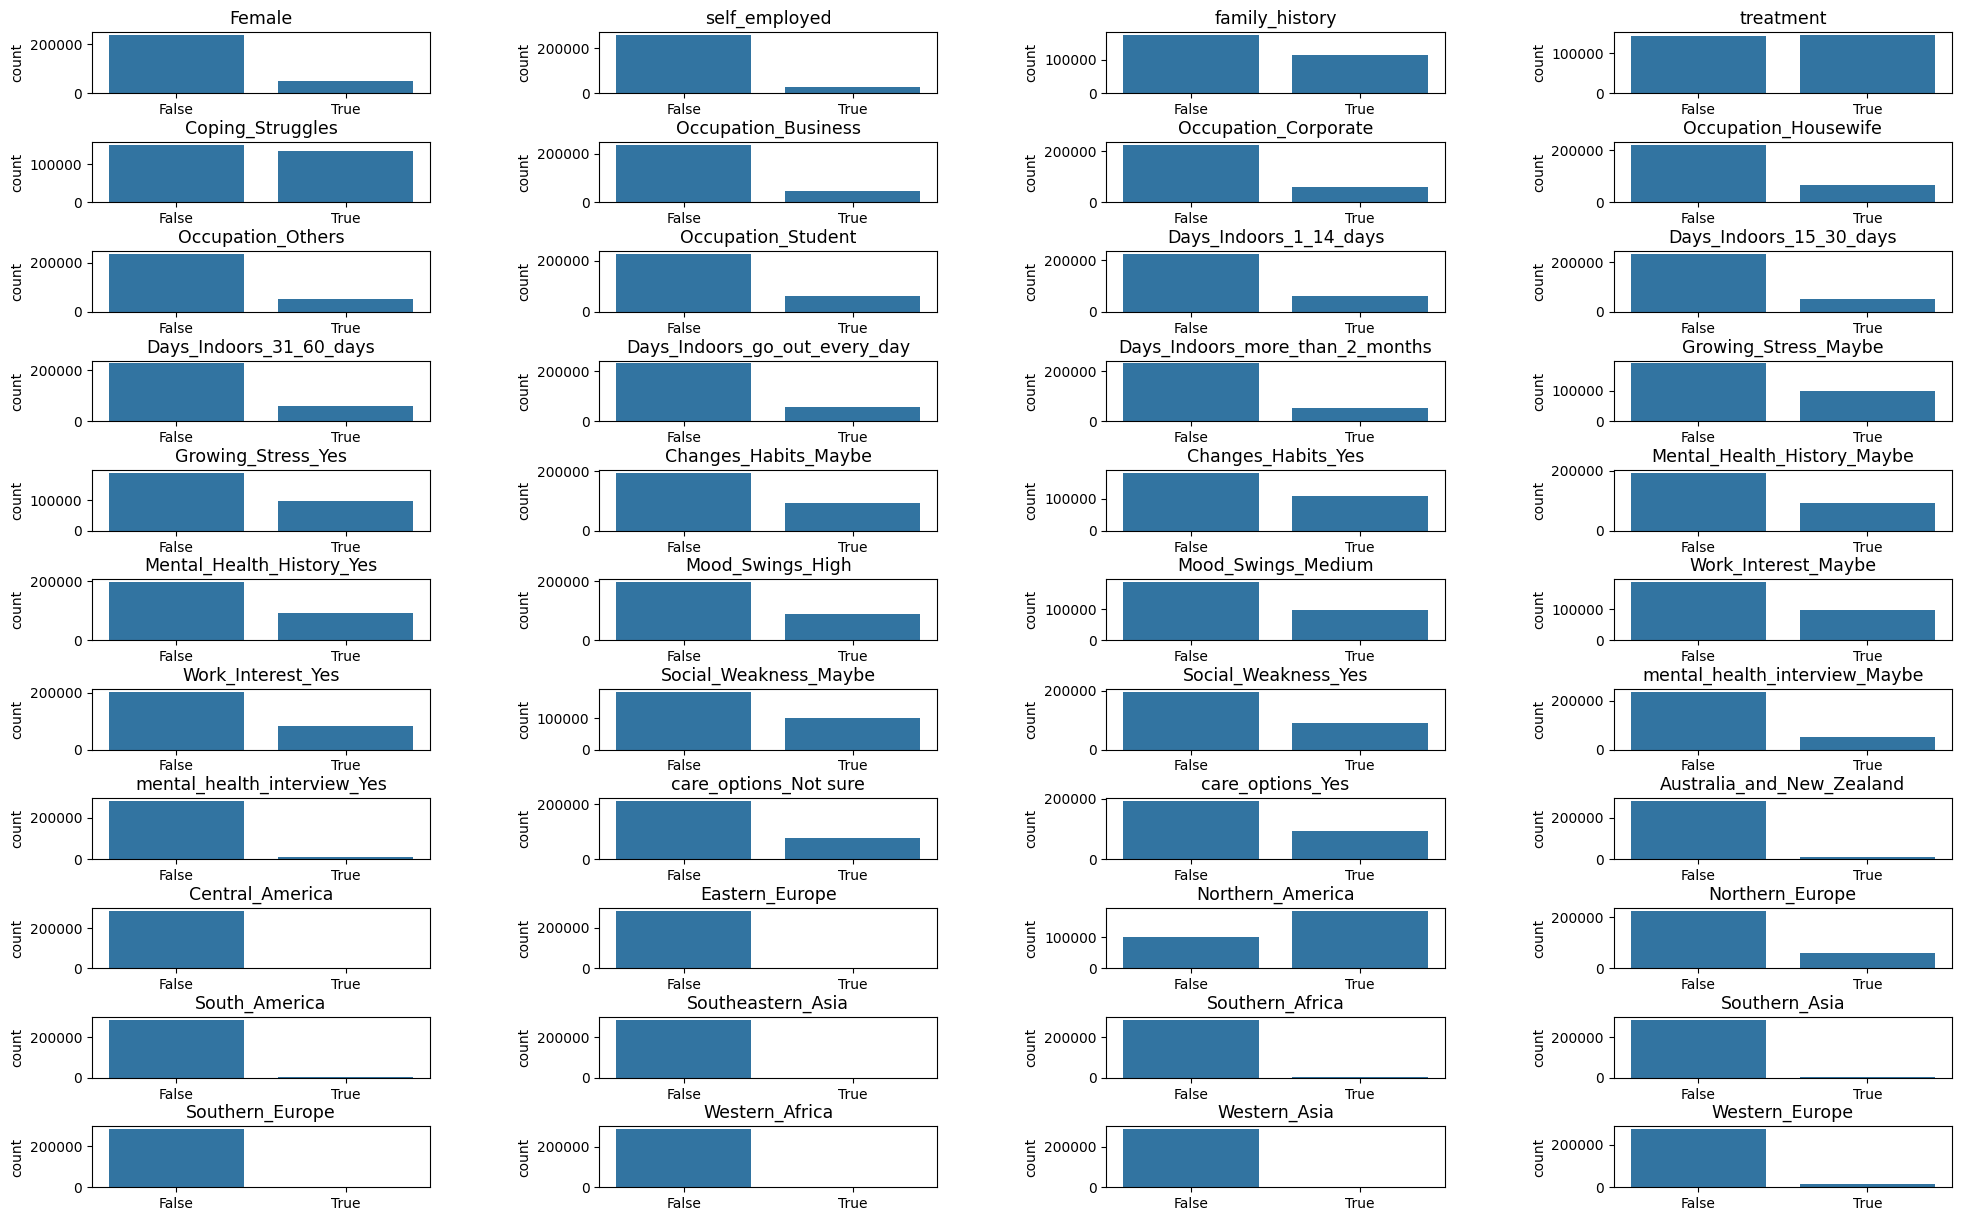

In [13]:
# Visualize columns
# Exclude `Timestamp` & `Country` columns
vis_cols = [col for col in data_proper.columns if col != "Timestamp" if col != "Country"]

figsize = (len(vis_cols)//4), len(vis_cols) // (len(vis_cols)//4)
fig, axes = plt.subplots(nrows=figsize[0], ncols=figsize[1], figsize=(24, 15))

# Adjust the space between subplots
plt.subplots_adjust(wspace=0.5, hspace=0.8)

# Plot counts
for i, (column, ax) in enumerate(zip(vis_cols, axes.flatten())):
    sns.countplot(data=data_proper, x=column, ax=ax)
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=10)
    ax.set_xlabel("")
    ax.set_ylabel(ax.get_ylabel(), fontsize=10)
    ax.set_title(column, fontsize=12.5)
if not(os.path.exists(r"value_counts_onehot.pdf")):
    plt.savefig(r"value_counts_onehot.pdf", bbox_inches="tight")
plt.show()

In [14]:
# Feature importances
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Get 20% sample to detect feature importances
X = data_proper.loc[:, [col for col in data_proper if col != "treatment" if col != "Timestamp" if 
                        col != "Country"]]
y = data_proper.loc[:, "treatment"]
X_20, _, y_20, _ = train_test_split(X, y, train_size=0.2, stratify=y, random_state=0)

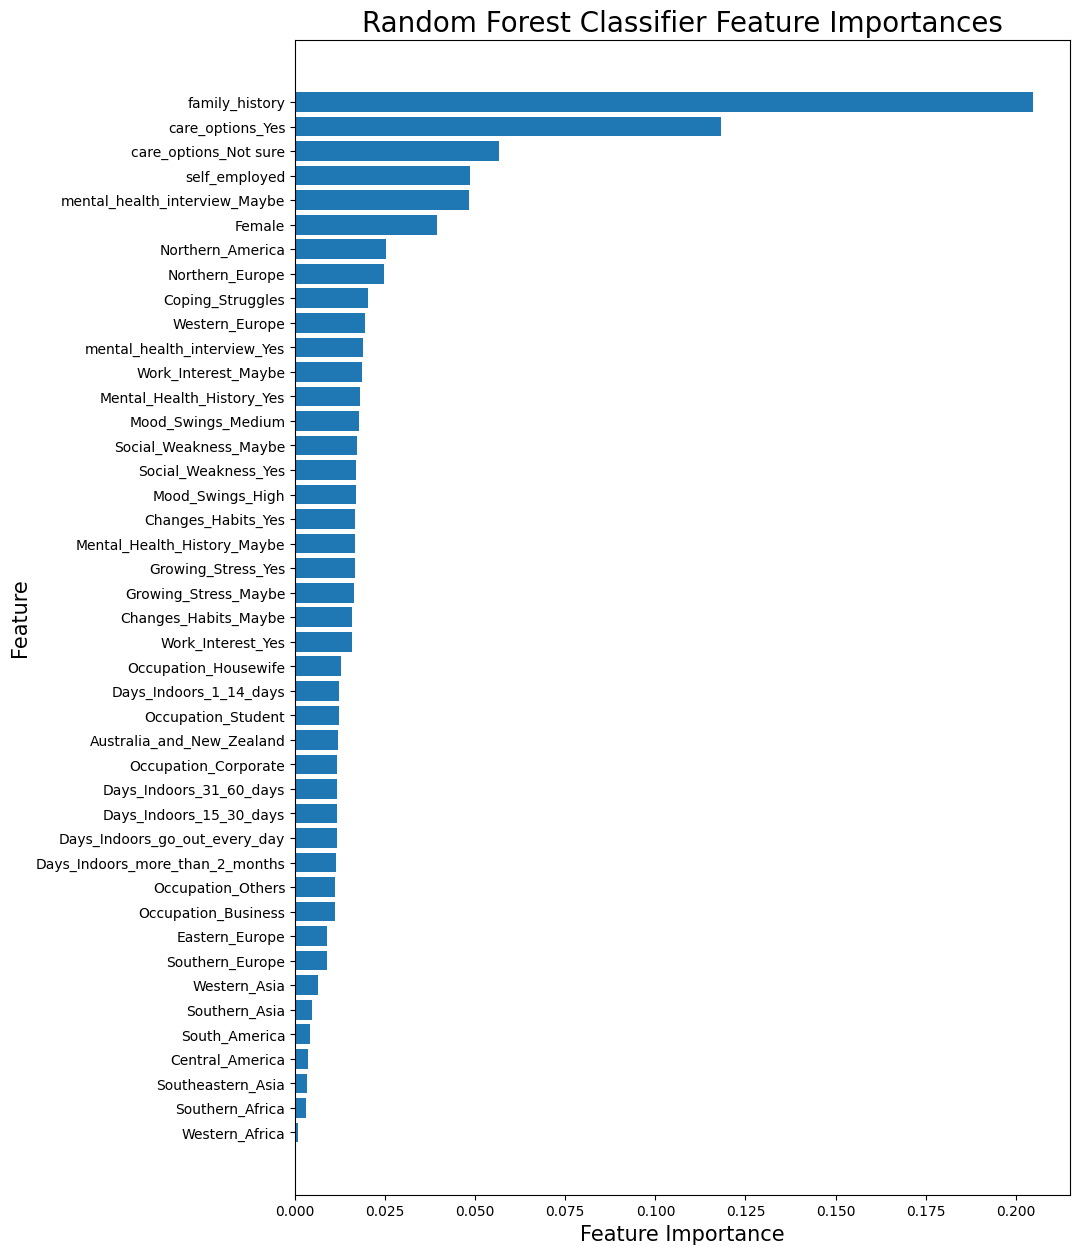

In [15]:
rf_classifier = RandomForestClassifier(random_state=0)

# Train the model with your data
rf_classifier.fit(X_20, y_20)  # Assuming X_train and y_train are your training features and labels

import matplotlib.pyplot as plt
import numpy as np

# Assuming you already have importances and column names
importances = rf_classifier.feature_importances_
column_names = X_20.columns

# Sort feature importances and corresponding column names
indices = np.argsort(importances)
sorted_column_names = [column_names[i] for i in indices]
sorted_importances = importances[indices]

# Plot the feature importances
plt.figure(figsize=(10, 15))
plt.barh(range(len(indices)), sorted_importances, align="center")
plt.yticks(range(len(indices)), sorted_column_names)
plt.xlabel("Feature Importance", fontsize=15)
plt.ylabel("Feature", fontsize=15)
plt.title("Random Forest Classifier Feature Importances", fontsize=20)
plt.show()

In [16]:
# Let's detect how accurate the classifier is
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# Get train and test data
X_50, _, y_50, _ = train_test_split(X, y, train_size=0.5, stratify=y, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X_50, y_50, test_size=0.3, stratify=y_50, random_state=0)

# Fit model
rf_classifier = RandomForestClassifier(random_state=0)
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(f"F1 score: {f1}")
print(f"Confusion matrix:\n {conf_matrix}")

Accuracy: 0.7125246662797446
F1 score: 0.7138664879728263
Confusion matrix:
 [[15245  6118]
 [ 6265 15447]]


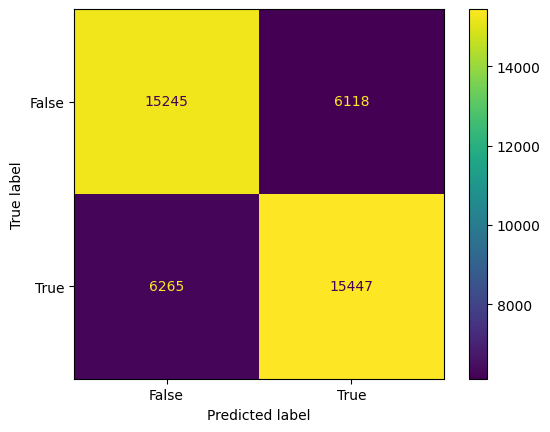

In [17]:
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,
                              display_labels=rf_classifier.classes_)
disp.plot()
plt.show()


In [18]:
def group_by_country(df: pd.DataFrame, col: str):
    """Groups a dataframe by country and selects a column."""
    
    def inner(country_col="Country"):
        df_grouped = df.copy(deep=True)
        df_grouped = df_grouped.loc[:, [country_col, col]]
        df_grouped = df_grouped.groupby(country_col)[col].mean()
        df_grouped = df_grouped.reset_index()
        return df_grouped
    
    return inner
group_by_country(data_proper, 'treatment')()

,Country,treatment
0,Australia,0.604381
1,Belgium,0.000000
2,Bosnia and Herz.,0.000000
3,Brazil,0.333333
4,Canada,0.575416
5,Colombia,0.000000
6,Costa Rica,0.000000
7,Croatia,1.000000
8,Czechia,0.000000
9,Denmark,1.000000


In [23]:
# If not already installed, install necessary packages
# !pip install pandas scikit-learn plotly

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.manifold import TSNE
import plotly.express as px

# Sample binary data
data = {
    'Feature1': [1, 0, 1, 0, 1],
    'Feature2': [0, 1, 0, 1, 0],
    'Feature3': [1, 1, 0, 0, 1],
    'Feature4': [0, 0, 1, 1, 0]
}
df = pd.DataFrame(data)

# Train a Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(df, np.zeros(df.shape[0]))  # Dummy target

# Compute the proximity matrix
leaf_indices = rf.apply(df)
n_samples = df.shape[0]
proximity_matrix = np.zeros((n_samples, n_samples))

for i in range(n_samples):
    for j in range(n_samples):
        proximity_matrix[i, j] = np.sum(leaf_indices[i] == leaf_indices[j])

# Normalize proximity matrix to get similarity (0 to 1 scale)
proximity_matrix /= rf.n_estimators

# Apply t-SNE to the proximity matrix
tsne = TSNE(n_components=2, metric="precomputed", random_state=42, perplexity=2,
            init='random')
tsne_results = tsne.fit_transform(1 - proximity_matrix)  # Use dissimilarity (1 - similarity)

# Create a DataFrame with the t-SNE results
tsne_df = pd.DataFrame(tsne_results, columns=['TSNE1', 'TSNE2'])

# Plot the results using Plotly
fig = px.scatter(tsne_df, x='TSNE1', y='TSNE2', title='Random Forest Similarity Map')
fig.show()
